In [1]:
import pandas as pd
filtered_wind_data = pd.read_parquet('../data/windmodel_data.parquet')

all_means_df = pd.read_parquet('../data/all_means_df.pqt')

In [2]:
# check the na counts per column
na_counts = pd.DataFrame(
    [
        all_means_df[col].isna().value_counts()
        for col 
        in all_means_df.columns
    ],index=all_means_df.columns)
# check the na counts, should be zero everywhere
na_counts

,False,True
temp,1087,1
dwpt,1087,1
rhum,1087,1
prcp,1086,2
wdir,1087,1
wspd,1087,1
wpgt,375,713
pres,1085,3
tsun,319,769


In [3]:
too_high = 70
high_enough = 18
perfect_speed = 19

In [4]:
def categorize(mean, max):
  if max > too_high:
    cat = 3
  else:
    cat = int(mean>high_enough) + (mean>perfect_speed)
  return cat

In [5]:
def categorize_binary(mean):
    return (mean>high_enough)

In [6]:
filtered_wind_data.loc[:,'suitable'] = [categorize_binary(x)
                              for x
                              in filtered_wind_data['wspd_mean']
]

# df.drop(['wspd_median_mean','above_median_mean','hour_mean'],inplace=True,axis=1)
# df.set_index('id',inplace=True)
filtered_wind_data.suitable.value_counts()

False    209
True     133
Name: suitable, dtype: int64

In [7]:
filtered_wind_data.columns

Index(['id', 'hour_mean', 'temp_mean', 'dwpt_mean', 'rhum_mean', 'prcp_mean',
       'snow_mean', 'wdir_mean', 'wspd_mean', 'wpgt_mean', 'pres_mean',
       'tsun_mean', 'coco_mean', 'wspd_median_mean', 'above_median_mean',
       'wspd_max', 'suitable'],
      dtype='object')

In [8]:
filtered_wind_data.drop(['hour_mean','snow_mean','above_median_mean','wspd_median_mean','coco_mean'],axis=1,inplace=True)

In [9]:
filtered_wind_data

,id,temp_mean,dwpt_mean,rhum_mean,prcp_mean,wdir_mean,wspd_mean,wpgt_mean,pres_mean,tsun_mean,wspd_max,suitable
0,10004,10.451261,7.449866,82.171136,0.117534,206.769842,40.445665,53.387573,1011.236250,0.000000,90.8,True
1,10007,10.127578,6.887558,80.854592,0.146445,212.271240,39.625527,52.256785,1011.780119,6.000000,83.0,True
2,10015,9.815853,6.324004,79.548739,0.117322,207.985671,36.419412,49.797198,1012.139140,8.709530,81.4,True
3,10018,10.416622,7.136504,81.362685,0.144268,218.759507,30.651869,47.688045,1011.417852,NaN,72.4,True
4,10020,9.980520,6.284137,78.926902,0.096464,222.283311,35.266428,51.367079,1011.330899,11.393763,78.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...
337,EDBO0,10.700174,4.939533,71.727355,0.081431,210.433600,16.238745,NaN,NaN,NaN,47.9,False
338,EDCE0,11.299701,4.989851,68.957264,0.070006,205.720700,15.745480,NaN,1011.700000,20.216193,37.4,False
339,EDHK0,11.825259,7.167886,74.981166,NaN,201.171599,21.042723,NaN,1011.540667,NaN,57.6,True
340,EDMG0,9.948297,4.835818,73.485027,0.101214,173.896123,14.728448,NaN,NaN,NaN,52.6,False


In [10]:
model_ids = filtered_wind_data.id

In [11]:
all_means_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun
id,,,,,,,,,
10004,11.183591,8.360795,83.261821,0.080176,198.548310,30.126426,41.561255,1013.817822,0.000000
10007,11.081906,7.946762,81.555184,0.105059,203.361730,29.454347,40.476545,1014.108209,3.000000
10015,10.936814,7.477791,79.947582,0.089194,204.287527,26.965759,37.540909,1014.087925,12.650690
10018,10.798407,7.650422,82.246560,0.103887,204.459598,22.528988,36.471962,1013.564366,NaN
10020,10.451094,6.789513,79.452712,0.074267,205.829421,26.275399,38.887773,1013.542898,12.665966


In [12]:
all_means_df.index = all_means_df.index.astype('str')

In [13]:
filtered_wind_data.set_index('id',inplace=True)
filtered_wind_data.index = filtered_wind_data.index.astype('str')

In [14]:
model_data_unfiltered = all_means_df.loc[model_ids]

In [15]:
model_data_unfiltered.columns

Index(['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'], dtype='object')

In [16]:
zscore_df = [
    (model_data_unfiltered[col] - model_data_unfiltered[col].mean()) / model_data_unfiltered[col].std(ddof=0)
    for col
    in model_data_unfiltered.columns
]

zscore_df = [
    series.to_frame()
    for series
    in zscore_df
]
# construct a df
zscore_df = pd.concat(zscore_df,axis=1)
# fill na with mean
zscore_df=zscore_df.fillna(0)
# rnadomize the order
zscore_df = zscore_df.sample(frac=1)

In [17]:
zscore_df

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun
id,,,,,,,,,
10267,0.256076,0.148472,-0.208009,-0.200646,0.202193,0.074628,-0.041766,-0.166077,0.143518
10742,0.846200,0.304987,-1.166215,-0.083864,-1.351435,-0.677864,-0.841721,0.716938,0.008192
D0096,0.834327,0.645282,-0.486945,-0.183479,-0.063917,-0.990089,0.000000,-0.340237,0.000000
10264,0.130304,0.058137,-0.137305,-0.166205,1.678615,-0.342218,-0.097770,-0.313042,-0.440638
10432,-0.056374,-0.036275,-0.044410,-0.059014,0.651893,0.318784,0.353046,0.257501,0.000000
...,...,...,...,...,...,...,...,...,...
10181,0.110847,0.955881,1.221802,-0.123018,0.280217,0.656868,0.679107,-0.556825,0.000000
10382,0.744351,-0.051787,-1.570861,-0.219264,0.275661,0.023673,-0.086179,-0.036551,-0.070365
10156,0.041081,0.458379,0.687035,-0.155730,-0.272271,-0.566589,-0.426563,-0.453736,-0.703404


In [18]:
# set y-column (suitable)
Y = (filtered_wind_data.suitable)

In [19]:
na_counts = pd.DataFrame(
    [
        zscore_df[col].isna().value_counts()
        for col 
        in zscore_df.columns
    ],index=zscore_df.columns)
# check the na counts, should be zero everywhere
na_counts

,False
temp,342
dwpt,342
rhum,342
prcp,342
wdir,342
wspd,342
wpgt,342
pres,342
tsun,342


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# set the x columns
X = zscore_df.drop(['wspd','wpgt','tsun'],axis=1)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X,
    Y,
    test_size=.2,
    stratify=Y,
    random_state=1
)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
from sklearn.metrics import accuracy_score, confusion_matrix
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
confusion_matrix(ytest,ypred)
accuracy_score(ytest,ypred)

0.5942028985507246

In [23]:
cm = pd.DataFrame(confusion_matrix(ytest,ypred))
cm.index.name = 'true'
cm.columns.name = 'pred'
cm

pred,0,1
true,,
0,41,1
1,27,0


In [24]:
pd.Series(dt.feature_importances_,index=xtrain.columns)

temp    0.000000
dwpt    0.114646
rhum    0.129047
prcp    0.275819
wdir    0.150254
pres    0.330234
dtype: float64

Prepare the models <br>
Models: <br>
DecisionTreeClassifier <br>
Random Forest <br>
Log Reg<br>
knn <br>
Neuronales Netz <br>
GradientBoosting

In [25]:
## Model: Decision Tree

# Vorbereitung & Importe
from sklearn.tree import DecisionTreeClassifier

# Definition des Algorithmus
decision_tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)

# Fitting des Decision Tree Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
decision_tree.fit(xtrain,ytrain)

# Der Decision Tree Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
dt_score = decision_tree.score(xtest,ytest)
print("Prognosegenauigkeit Decision Tree:\t\t ", dt_score)

Prognosegenauigkeit Decision Tree:		  0.5507246376811594


In [26]:
# import Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [27]:
# run models

# collect accuracy scores in dict to compare
acc_dict = {} 
##### Decision Tree

# Fitting des Decision Tree Algorithmus auf den Trainingsdatensatz
decision_tree_train = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
decision_tree_train.fit(xtrain, ytrain)

# Der Decision Tree Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("Prognosegenauigkeit Decision Tree:\n")
print("Testdaten:\t", decision_tree_train.score(xtest, ytest))
acc_dict['decision tree'] = decision_tree_train.score(xtest, ytest)

##### Random Forest

# Fitting des Random Forest Algorithmus auf den Trainingsdatensatz
random_forest_train = RandomForestClassifier(random_state=1)
random_forest_train.fit(xtrain, ytrain)

# Der Random Forest Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Random Forest:\n")
print("Testdaten:\t", random_forest_train.score(xtest, ytest))
acc_dict['random forest']= random_forest_train.score(xtest, ytest)


##### Logistic Regression

# Fitting des Logistic Regression Algorithmus auf den Trainingsdatensatz
logistic_regression_train = LogisticRegression(max_iter=1000)
logistic_regression_train.fit(xtrain, ytrain)

# Der Logistic Regression Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Logistic Regression:\n")
print("Testdaten:\t", logistic_regression_train.score(xtest, ytest))
acc_dict['logistic regression']= logistic_regression_train.score(xtest, ytest)


##### K-Nearest Neighbors

# Fitting des K-Nearest Neighbors Algorithmus auf den Trainingsdatensatz
knn_train = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_train.fit(xtrain, ytrain)

# Der K-Nearest Neighbors Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit K-Nearest Neighbors:\n")
print("Testdaten:\t", knn_train.score(xtest, ytest))
acc_dict['knearest neighbors']=knn_train.score(xtest, ytest)

##### Neuronales Netz

# Fitting des Neuronalen Netz Algorithmus auf den Trainingsdatensatz
neuronales_netz_train = MLPClassifier(max_iter=1000)
neuronales_netz_train.fit(xtrain, ytrain)

# Der Neuronales Netz Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Neuronales Netz:\n")
print("Testdaten:\t", neuronales_netz_train.score(xtest, ytest))
acc_dict['neuronales netz']=neuronales_netz_train.score(xtest, ytest)

##### Gradient Tree Boosting

# Fitting des Gradient Boosting Algorithmus auf den Trainingsdatensatz
gradient_booosting_train = GradientBoostingClassifier()
gradient_booosting_train.fit(xtrain, ytrain)

# Der Gradient Boosting Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Gradient Tree Boosting:\n")
print("Testdaten:\t", gradient_booosting_train.score(xtest, ytest))
acc_dict['gradient boosting']= gradient_booosting_train.score(xtest, ytest)


Prognosegenauigkeit Decision Tree:

Testdaten:	 0.5507246376811594


Prognosegenauigkeit Random Forest:

Testdaten:	 0.5362318840579711


Prognosegenauigkeit Logistic Regression:

Testdaten:	 0.6086956521739131


Prognosegenauigkeit K-Nearest Neighbors:

Testdaten:	 0.5217391304347826


Prognosegenauigkeit Neuronales Netz:

Testdaten:	 0.5362318840579711


Prognosegenauigkeit Gradient Tree Boosting:

Testdaten:	 0.6086956521739131


G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# turn accuracy dict into dataframe and plot
acc_df = pd.DataFrame(acc_dict,index=['accuracy score']).T
# load acc_df based on stds
acc_df_std = pd.read_csv('../data/acc_df_std.csv',index_col=0)

<AxesSubplot:title={'center':'Accuracy of ML models for suitable wind power locations'}>

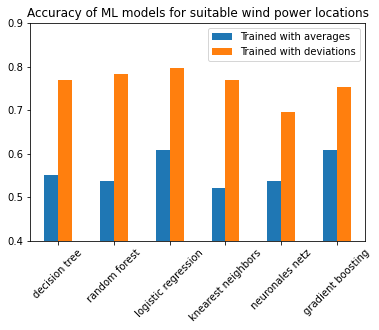

In [29]:
# compare the acc_scores
compare_acc_df = pd.concat([acc_df,acc_df_std],axis=1)
compare_acc_df.columns = ['Trained with averages','Trained with deviations']
compare_acc_df.plot(kind='bar',ylim=(0.40,0.9),rot=45, title='Accuracy of ML models for suitable wind power locations')
# result: training a model with std values seems much more worthwile
# following this comparison we tried to improve the model performance while keeping mean values for the training, this did not work out

# main part ends here
following code was an experiment but not used for the final result

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy Decision Tree: 0.5507
Confusion Matrix: 
 [[28 14]
 [17 10]]
Accuracy Random Forest: 0.5072
Confusion Matrix: 
 [[32 10]
 [24  3]]
Accuracy Logistic Regression: 0.5942
Confusion Matrix: 
 [[41  1]
 [27  0]]
Accuracy K-Nearest Neighbors: 0.5217
Confusion Matrix: 
 [[29 13]
 [20  7]]


G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Neuronales Netz: 0.5652
Confusion Matrix: 
 [[32 10]
 [20  7]]
Accuracy Gradient Tree Boosting: 0.5507
Confusion Matrix: 
 [[32 10]
 [21  6]]


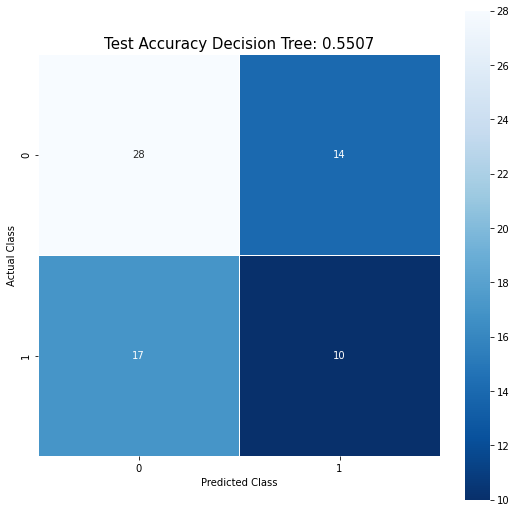

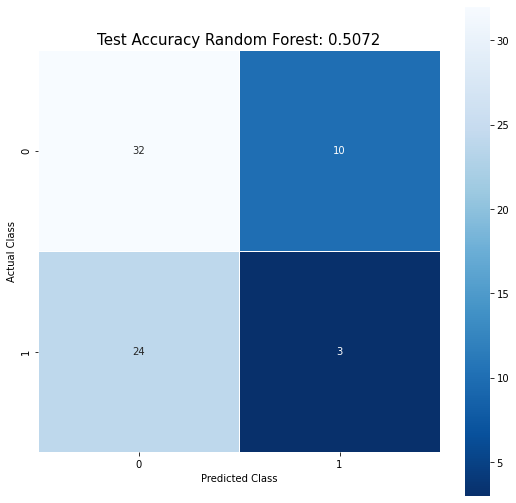

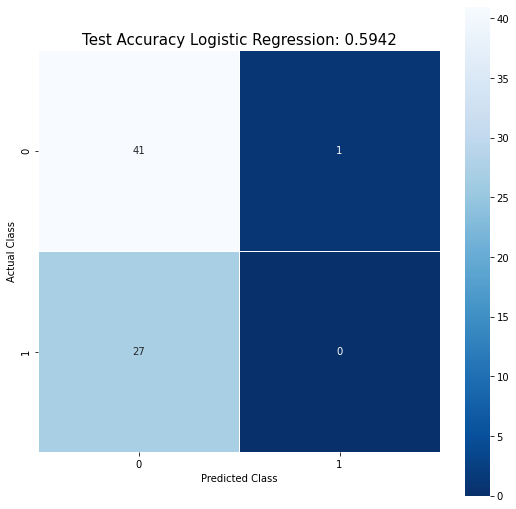

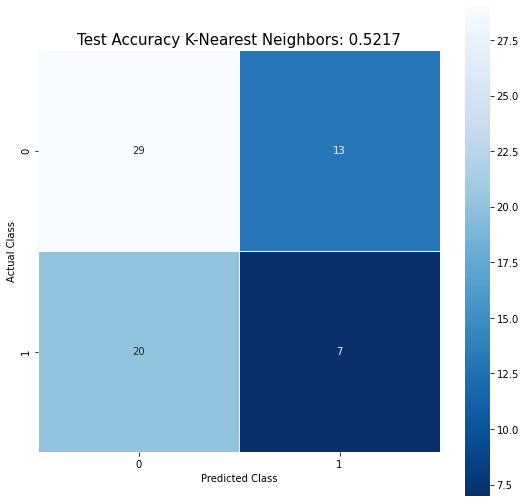

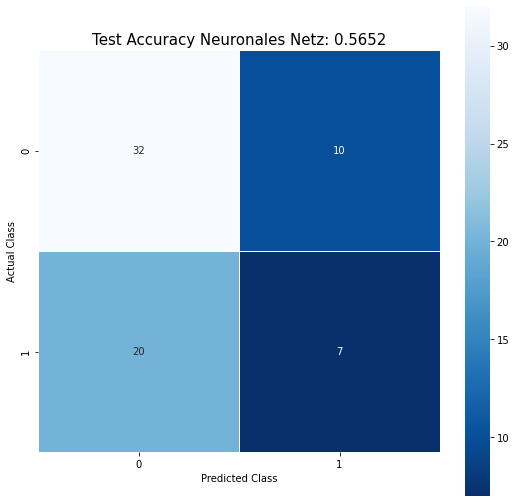

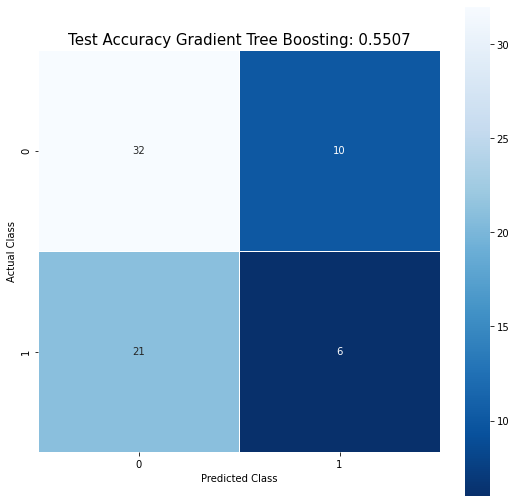

In [31]:
# Vorbereitung & Importe
from sklearn import metrics

##### Decision Tree

# Decision Tree Algorithmus aus b)
clf_tree = decision_tree_train.fit(xtrain, ytrain)

# Prognosegenauigkeit
score_tree = clf_tree.score(xtest, ytest)
print ("Accuracy Decision Tree: %0.4f" % (score_tree))

# Prognosen
predictions_tree = clf_tree.predict(xtest)
predictions_tree

# Definition der Confusion Matrix
cm_tree = metrics.confusion_matrix(ytest, predictions_tree)
print("Confusion Matrix: \n", cm_tree)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_tree, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Decision Tree: %0.4f" % (score_tree)
plt.title(all_sample_title, size = 15);


##### Random Forest

# Random Forest Algorithmus aus b)
clf_random_forest = random_forest_train.fit(xtrain, ytrain)

# Prognosegenauigkeit
score_random_forest = clf_random_forest.score(xtest, ytest)
print ("Accuracy Random Forest: %0.4f" % (score_random_forest))

# Prognosen
predictions_random_forest = clf_random_forest.predict(xtest)
predictions_random_forest

# Definition der Confusion Matrix
cm_random_forest = metrics.confusion_matrix(ytest, predictions_random_forest)
print("Confusion Matrix: \n", cm_random_forest)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_random_forest, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Random Forest: %0.4f" % (score_random_forest)
plt.title(all_sample_title, size = 15);


##### Logistic Regression

# Logistic Regression Algorithmus aus b)
clf_logreg = logistic_regression_train.fit(xtrain, ytrain)

# Prognosegenauigkeit
score_logreg = clf_logreg.score(xtest, ytest)
print ("Accuracy Logistic Regression: %0.4f" % (score_logreg))

# Prognosen
predictions_logreg = clf_logreg.predict(xtest)
predictions_logreg

# Definition der Confusion Matrix
cm_logreg = metrics.confusion_matrix(ytest, predictions_logreg)
print("Confusion Matrix: \n", cm_logreg)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_logreg, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Logistic Regression: %0.4f" % (score_logreg)
plt.title(all_sample_title, size = 15);


##### K-Nearest Neighbors

# K-Nearest Neighbors Algorithmus aus b)
clf_knn = knn_train.fit(xtrain, ytrain)

# Prognosegenauigkeit
score_knn = clf_knn.score(xtest, ytest)
print ("Accuracy K-Nearest Neighbors: %0.4f" % (score_knn))

# Prognosen
predictions_knn = clf_knn.predict(xtest)
predictions_knn

# Definition der Confusion Matrix
cm_knn = metrics.confusion_matrix(ytest, predictions_knn)
print("Confusion Matrix: \n", cm_knn)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy K-Nearest Neighbors: %0.4f" % (score_knn)
plt.title(all_sample_title, size = 15);


##### Neuronales Netz

# Neuronales Netz Algorithmus aus b)
clf_neuronales_netz = neuronales_netz_train.fit(xtrain, ytrain)

# Prognosegenauigkeit
score_neuronales_netz = clf_neuronales_netz.score(xtest, ytest)
print ("Accuracy Neuronales Netz: %0.4f" % (score_neuronales_netz))

# Prognosen
predictions_neuronales_netz = clf_neuronales_netz.predict(xtest)
predictions_neuronales_netz

# Definition der Confusion Matrix
cm_neuronales_netz = metrics.confusion_matrix(ytest, predictions_neuronales_netz)
print("Confusion Matrix: \n", cm_neuronales_netz)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_neuronales_netz, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Neuronales Netz: %0.4f" % (score_neuronales_netz)
plt.title(all_sample_title, size = 15);


##### Gradient Tree Boosting

# Gradient Tree Boosting Algorithmus aus b)
clf_gradient_boosting = gradient_booosting_train.fit(xtrain, ytrain)

# Prognosegenauigkeit
score_gradient_boosting = clf_gradient_boosting.score(xtest, ytest)
print ("Accuracy Gradient Tree Boosting: %0.4f" % (score_gradient_boosting))

# Prognosen
predictions_gradient_boosting = clf_gradient_boosting.predict(xtest)
predictions_gradient_boosting

# Definition der Confusion Matrix
cm_gradient_boosting = metrics.confusion_matrix(ytest, predictions_gradient_boosting)
print("Confusion Matrix: \n", cm_gradient_boosting)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_gradient_boosting, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Gradient Tree Boosting: %0.4f" % (score_gradient_boosting)
plt.title(all_sample_title, size = 15);

In [32]:
# Vorbereitung & Importe
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import display, HTML

cv_kfold = KFold(n_splits = 10)


##### Decision Tree

# Decision Tree Algorithmus aus c)
clf_tree_kfold = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)

# Prognosegenauigkeit
score_tree_kfold = cross_val_score(clf_tree_kfold, X, Y, cv = cv_kfold)



##### Random Forest

# Random Forest Algorithmus aus c)
clf_random_forest_kfold = RandomForestClassifier(random_state=1)

# Prognosegenauigkeit
score_random_forest_kfold = cross_val_score(clf_random_forest_kfold, X, Y, cv = cv_kfold)



##### Logistic Regression

# Logistic Regression Algorithmus aus c)
clf_logreg_kfold = LogisticRegression(max_iter=1000)

# Prognosegenauigkeit
score_logreg_kfold = cross_val_score(clf_logreg_kfold, X, Y, cv = cv_kfold)


##### K-Nearest Neighbors

# K-Nearest Neighbors Algorithmus aus c)
clf_knn_kfold = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Prognosegenauigkeit
score_knn_kfold = cross_val_score(clf_knn_kfold, X, Y, cv = cv_kfold)



##### Neuronales Netz

# Neuronales Netz Algorithmus aus c)
clf_neuronales_netz_kfold = MLPClassifier(max_iter=1000)

# Prognosegenauigkeit
score_neuronales_netz_kfold = cross_val_score(clf_neuronales_netz_kfold, X, Y, cv = cv_kfold)



##### Gradient Tree Boosting

# Gradient Boosting Algorithmus aus c)
clf_gradient_boosting_kfold = GradientBoostingClassifier()

# Prognosegenauigkeit
score_gradient_boosting_kfold = cross_val_score(clf_gradient_boosting_kfold, X, Y, cv = cv_kfold)


df_plot_kfold_class = pd.DataFrame(
        {'Decision Tree': score_tree_kfold,
         'Random Forest': score_random_forest_kfold,
         'Logistic Regression': score_logreg_kfold,
         'K-Nearest Neighbors': score_knn_kfold,
         'Neuronales Netz': score_neuronales_netz_kfold,
         'Gradient Tree Boosting': score_gradient_boosting_kfold}
)

display(df_plot_kfold_class.describe())

G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
G:\Anaconda\envs\mapenv\lib\site-packages\sklearn\neural_network\_multil

,Decision Tree,Random Forest,Logistic Regression,K-Nearest Neighbors,Neuronales Netz,Gradient Tree Boosting
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.541849,0.550840,0.616303,0.562773,0.530420,0.527059
std,0.164085,0.146903,0.244099,0.159178,0.140385,0.127396
min,0.171429,0.228571,0.057143,0.200000,0.257143,0.285714
25%,0.536765,0.503992,0.522059,0.482563,0.448529,0.518067
50%,0.588235,0.602941,0.705882,0.617647,0.558824,0.544118
75%,0.613235,0.647059,0.764706,0.647059,0.617647,0.617647
max,0.735294,0.705882,0.882353,0.735294,0.735294,0.647059


In [33]:
import plotly.express as px

In [34]:
# Darstellung als Boxplot
fig = px.box(df_plot_kfold_class)
fig.update_layout(
    title='K-Fold Cross Validation',
    xaxis_title='Modelle',
    yaxis_title=' ',
)

In [35]:
import numpy as np
# Vorbereitung & Importe
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [36]:
# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
# simplefilter("ignore", category=ConvergenceWarning)

# Definieren der inneren und äußeren Validierungsschleife
inner_cv = KFold(n_splits=10)
outer_cv = KFold(n_splits=10)


##### Decision Tree

# Definition des Modells und der Hyperparameter
estimator_tree_class = DecisionTreeClassifier(random_state=1)
range_max_depth = np.arange(start=1, stop=100, step=10, dtype=int)
range_min_samples_leaf = np.arange(start=1, stop=10, step=1, dtype=int)

# Definition der verschachtelten Kreuzvalidierung
grid_tree_class = [
    {'max_depth': range_max_depth},
    {'min_samples_split': [18]},
    {'min_samples_leaf': range_min_samples_leaf}
]

nested_tree_class = GridSearchCV(estimator=estimator_tree_class, param_grid=grid_tree_class, cv=inner_cv)
scores_tree_class =  cross_val_score(nested_tree_class, X, Y, cv=outer_cv)

#print("Accuracy Decision Tree: ")
#print("Mittelwert:\t\t %.3f" % scores_tree_class.mean())
#print("Standardabweichung:\t %.3f" % scores_tree_class.std())


##### Random Forest

# Definition des Modells und der Hyperparameter
estimator_forest_class = RandomForestClassifier(random_state=1)

# Definition der verschachtelten Kreuzvalidierung
grid_forest_class = dict(n_estimators=[260], max_depth=[20], min_samples_split=[8], min_samples_leaf=[1])

nested_forest_class = GridSearchCV(estimator=estimator_forest_class, param_grid=grid_forest_class, cv=inner_cv)
scores_forest_class =  cross_val_score(nested_forest_class, X, Y, cv=outer_cv)


KeyboardInterrupt: 

In [ ]:
scores_tree_class

array([0.08571429, 0.37142857, 0.58823529, 0.70588235, 0.61764706,
       0.5       , 0.73529412, 0.88235294, 0.5       , 0.79411765])

In [ ]:
##### ROC-Curve

### Decision Tree

# calculate the fpr and tpr for all thresholds of the classification
nested_tree_class.fit(xtrain, ytrain)
probs_tree = nested_tree_class.predict_proba(xtest)
preds_tree = probs_tree[:,1]
fpr_tree, tpr_tree, threshold = metrics.roc_curve(ytest, preds_tree)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)


### Random Forest

# calculate the fpr and tpr for all thresholds of the classification
nested_forest_class.fit(xtrain, ytrain)
probs_forest = nested_forest_class.predict_proba(xtest)
preds_forest = probs_forest[:,1]
fpr_forest, tpr_forest, threshold = metrics.roc_curve(ytest, preds_forest)
roc_auc_forest = metrics.auc(fpr_forest, tpr_forest)

In [ ]:
nested_tree_class.best_params_
nested_forest_class.best_params_

{'min_samples_split': 18}

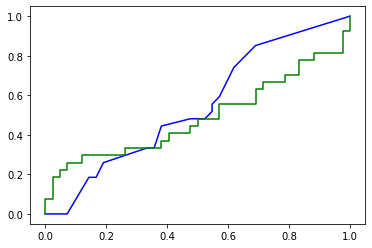

In [ ]:
plt.plot(fpr_tree, tpr_tree, 'b', label = 'Decision Tree: %0.2f' % roc_auc_tree)
plt.plot(fpr_forest, tpr_forest, 'g', label = 'Random Forest: %0.2f' % roc_auc_forest)